
# **Stock Price Prediction using Machine Learning in Python**

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')


## Importing Dataset


In [ ]:
df = pd.read_csv('INR=X.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


#### From the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0
261,2021-01-26,72.970001,73.222000,72.774498,72.970001,72.970001,0


# **Data Information**

In [ ]:
df.shape


(262, 7)

#### From this, we got to know that there are 262 rows of data available and for each row, we have 7 different features or columns.

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB



# **Exploratory Data Analysis**

### While performing the EDA of the Tesla Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

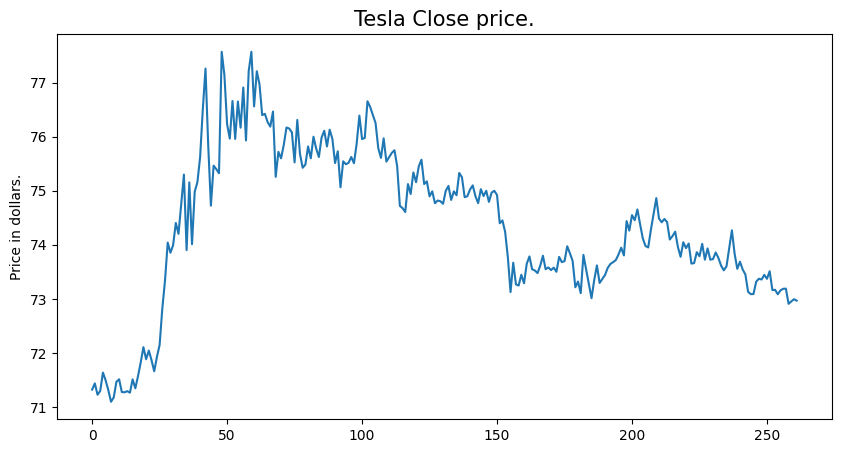

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


### The prices of tesla stocks are showing an downward trend as depicted by the plot of the closing price of the stocks.

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


#### If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [ ]:
df[df['Close'] == df['Adj Close']].shape


(262, 7)

#### From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [ ]:
df = df.drop(['Adj Close'], axis=1)


#### Now let’s draw the distribution plot for the continuous features given in the dataset.

#### Before moving further let’s check for the null values if any are present in the data frame.

In [ ]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

#### This implies that there are no null values in the data set provided.

# Distribution Plot

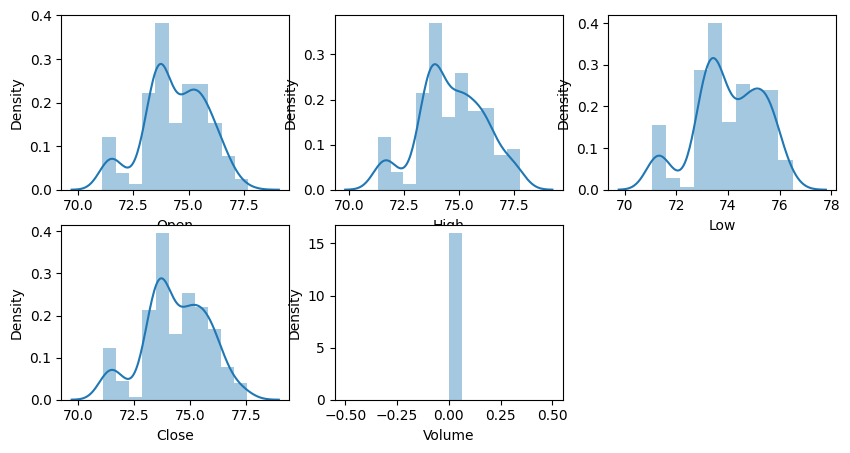

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(10,5))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


#### In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions.

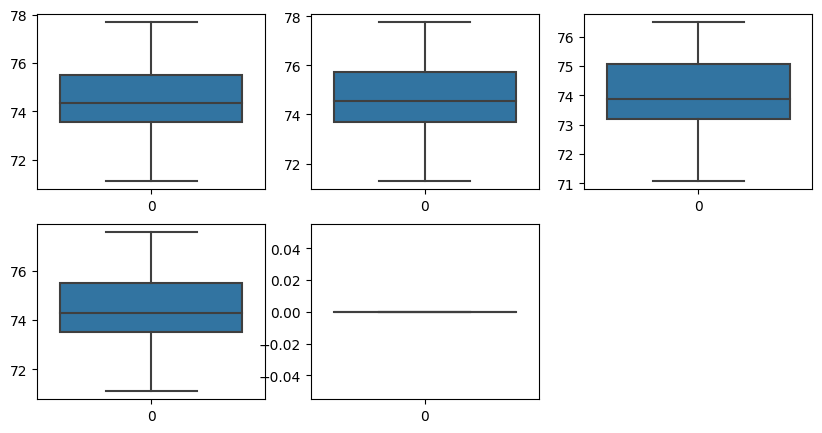

In [ ]:
plt.subplots(figsize=(10,5))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


#### From the above boxplots, we can conclude that the columns are free from any outlier.

# **Feature Engineering**


#### Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [ ]:

splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,0,27,1,2020
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,0,28,1,2020
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,0,29,1,2020
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,0,30,1,2020
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,0,31,1,2020


#### Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head(30)


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,0,27,1,2020,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,0,28,1,2020,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,0,29,1,2020,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,0,30,1,2020,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,0,31,1,2020,0
5,2020-02-03,71.544998,71.699997,71.265503,71.496498,0,3,2,2020,0
6,2020-02-04,71.314102,71.514999,71.084999,71.314102,0,4,2,2020,0
7,2020-02-05,71.100403,71.279999,71.099899,71.099998,0,5,2,2020,0
8,2020-02-06,71.181000,71.397499,71.121002,71.180000,0,6,2,2020,0
9,2020-02-07,71.470001,71.570999,71.177498,71.470001,0,7,2,2020,0


#### A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,0,27,1,2020,0,-0.004997,-0.315002,1
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,0,28,1,2020,0,0.214997,-0.476998,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,0,29,1,2020,0,-0.000297,-0.256500,1
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,0,30,1,2020,0,0.000000,-0.411995,1
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,0,31,1,2020,0,0.000000,-0.362503,0


#### Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

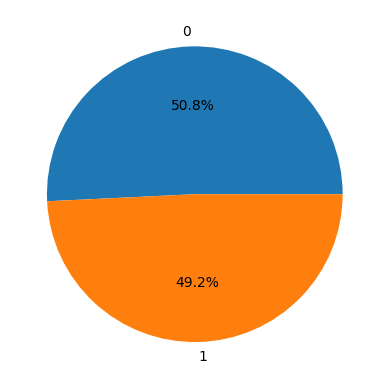

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


#### When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

##### (As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.)

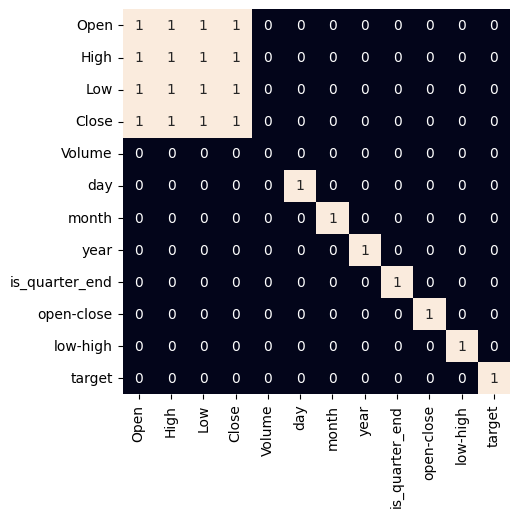

In [ ]:
plt.figure(figsize=(5,5))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#### From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

## Importing More Libraries for ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# **Data Splitting and Normalization**

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.2)
print(X_train.shape, X_valid.shape)


(209, 3) (53, 3)


#### After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 100/20 ratio so, that we can evaluate the performance of our model on unseen data.

# **MACHINE LEARNING TECHNIQUES -**

# **1. Model Development and Evaluation (General)**

#### Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.



In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1])*100)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1])*100)
  print()


LogisticRegression() : 
Training Accuracy :  60.79868107712036
Validation Accuracy :  47.008547008547005

SVC(kernel='poly', probability=True) : 
Training Accuracy :  35.78494229712401
Validation Accuracy :  51.35327635327636

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy 

## Splitting the Data


Libraries -

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import  MinMaxScaler


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


# Spliting the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


# Creating sequences and labels for training
def create_sequences(data, sequence_length):
  sequences = []
  labels = []
  for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    labels.append(data[i+sequence_length])
  return np.array(sequences), np.array(labels)
sequence_length = 30
train_sequences, train_labels = create_sequences(train_data, sequence_length)
test_sequences, test_labels = create_sequences(test_data, sequence_length)


# Reshaping the test_sequences to match the number of features
test_sequences = test_sequences.reshape(test_sequences.shape[0], test_sequences.shape[1])

# **2. LSTM - Long Short Term Memory Networks**
# **(Specifically for trading in stock market)**

In [ ]:
prices = df["Close"].values.reshape(-1, 1)

## Step 1) Test Data Prediction Visualisation



In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


# model training
model.fit(train_sequences, train_labels, epochs=10, batch_size=32)


# model evaluation
mse = model.evaluate(test_sequences, test_labels)


# Making predictions
predicted_data = model.predict(test_sequences)
predicted_data = predicted_data.reshape(predicted_data.shape[0], 1)


# Inverse scaling for test data
predicted_prices = scaler.inverse_transform(predicted_data)
actual_prices = scaler.inverse_transform(test_labels)

Epoch 1/10
6/6 [==============================] - 4s 31ms/step - loss: 0.1634
Epoch 2/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0408
Epoch 3/10
6/6 [==============================] - 0s 29ms/step - loss: 0.0185
Epoch 4/10
6/6 [==============================] - 0s 31ms/step - loss: 0.0218
Epoch 5/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0130
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0136
Epoch 7/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0113
Epoch 8/10
6/6 [==============================] - 0s 30ms/step - loss: 0.0115
Epoch 9/10
6/6 [==============================] - 0s 32ms/step - loss: 0.0106
Epoch 10/10
1/1 [==============================] - 1s 771ms/step


### Plotting the actual and predicted prices graph -

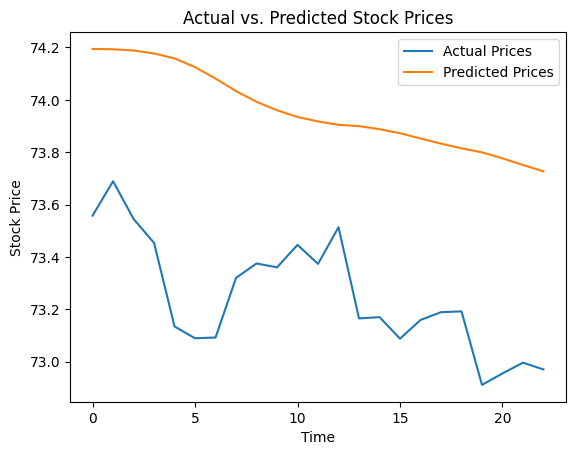

In [ ]:
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

## Step 2) Full Data Prediction Visualisation

In [ ]:
# Defining the sequence length
sequence_length = 50


# Create the sequences and labels
sequences, labels = create_sequences(scaled_data, sequence_length)


# Reshaping the input data
sequences = np.reshape(sequences, (sequences.shape[0], sequences.shape[1], 1))


# Defining the input shape for LSTM
input_shape = (sequences.shape[1], 1)


# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=50))
model.add(Dense(units=1))


# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')


# Training the model
model.fit(sequences, labels, epochs=10, batch_size=32)


# Making predictions
predicted_fulldata = model.predict(sequences)
predicted_prices = scaler.inverse_transform(predicted_fulldata)


# Inverse scaling for the actual prices
actual_prices = scaler.inverse_transform(labels.reshape(-1, 1))

Epoch 1/10
7/7 [==============================] - 4s 47ms/step - loss: 0.0937
Epoch 2/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0218
Epoch 3/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0127
Epoch 4/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0067
Epoch 5/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0076
Epoch 6/10
7/7 [==============================] - 0s 49ms/step - loss: 0.0058
Epoch 7/10
7/7 [==============================] - 1s 78ms/step - loss: 0.0057
Epoch 8/10
7/7 [==============================] - 1s 84ms/step - loss: 0.0052
Epoch 9/10
7/7 [==============================] - 1s 80ms/step - loss: 0.0049
Epoch 10/10
7/7 [==============================] - 1s 16ms/step


### Plotting the actual and predicted prices graph -

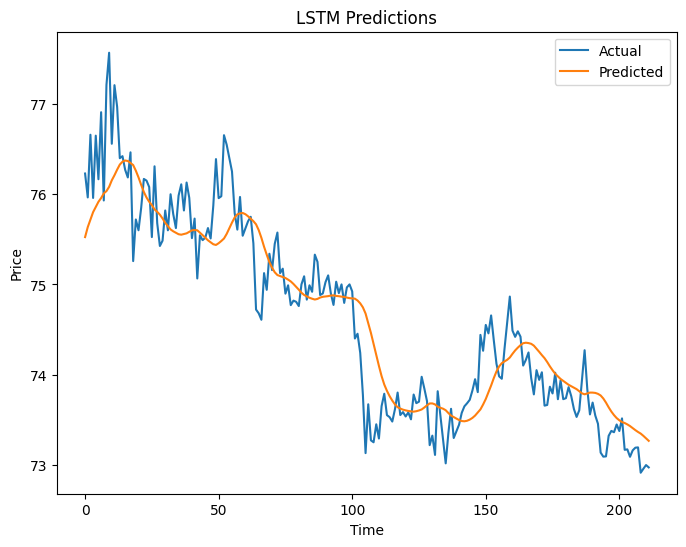

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('LSTM Predictions')
plt.legend()
plt.show()


### Prediction Results: The LSTM model successfully predicted stock prices based on the historical data. The model's accuracy was measured against the actual stock prices, its performance was evaluated using appropriate metrics such as mean squared error(MSE) and root mean squared error (RMSE) providing valuable insights into its predictive capabilities.


# Thus, The LSTM model was trained on historical stock price data, and the model was optimized to achieve the best possible predictions.

# This was all about Stock Market Prediction using Machine Learning.